Load Libraries and required tools

In [2]:
from __future__ import print_function, division

import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn as sk
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.externals import joblib #alternative to pickling
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB, MultinomialNB, GaussianNB
from sklearn.dummy import DummyClassifier
import seaborn as sns
import statsmodels.api as sm
#import cpi

%matplotlib inline

Retrieve red and white wine data from remote URL

In [3]:
requests.__path__

dataset_url_red = 'http://mlr.cs.umass.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv'
data_red = pd.read_csv(dataset_url_red)

dataset_url_white = 'http://mlr.cs.umass.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv'
data_white = pd.read_csv(dataset_url_white)

#response = requests.get(dataset_url)
#response.status_code

Run "diagnostics" for reds

In [4]:
data_red = pd.read_csv(dataset_url_red, sep=';')#csv is actually separated by semicolons

In [5]:
data_red['quality'].unique()

array([5, 6, 7, 4, 8, 3])

In [6]:
data_red.shape

(1599, 12)

In [7]:
data_red.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [8]:
data_red.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
fixed acidity           1599 non-null float64
volatile acidity        1599 non-null float64
citric acid             1599 non-null float64
residual sugar          1599 non-null float64
chlorides               1599 non-null float64
free sulfur dioxide     1599 non-null float64
total sulfur dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null int64
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [9]:
data_red.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [10]:
data_red.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


In [11]:
#sns.set(font_scale = 1)
#sns.pairplot(data_red, palette = "coolwarm"); 

Pairs plots indicate uncorrelated random variabls with the exception of alcohol and density. As expected there appears to be negative correlation between alcohol and density.    

Run "diagnostics" for whites

In [12]:
data_white = pd.read_csv(dataset_url_white, sep=';')#csv is actually separated by semicolons

In [13]:
data_white.shape

(4898, 12)

In [14]:
data_white.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [15]:
data_white.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
fixed acidity           4898 non-null float64
volatile acidity        4898 non-null float64
citric acid             4898 non-null float64
residual sugar          4898 non-null float64
chlorides               4898 non-null float64
free sulfur dioxide     4898 non-null float64
total sulfur dioxide    4898 non-null float64
density                 4898 non-null float64
pH                      4898 non-null float64
sulphates               4898 non-null float64
alcohol                 4898 non-null float64
quality                 4898 non-null int64
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [16]:
data_white.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


In [17]:
data_white['quality'].unique()

array([6, 5, 7, 8, 4, 3, 9])

In [18]:
data_white.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.022697,0.289181,0.089021,0.023086,-0.049396,0.091070,0.265331,-0.425858,-0.017143,-0.120881,-0.113663
volatile acidity,-0.022697,1.000000,-0.149472,0.064286,0.070512,-0.097012,0.089261,0.027114,-0.031915,-0.035728,0.067718,-0.194723
citric acid,0.289181,-0.149472,1.000000,0.094212,0.114364,0.094077,0.121131,0.149503,-0.163748,0.062331,-0.075729,-0.009209
residual sugar,0.089021,0.064286,0.094212,1.000000,0.088685,0.299098,0.401439,0.838966,-0.194133,-0.026664,-0.450631,-0.097577
chlorides,0.023086,0.070512,0.114364,0.088685,1.000000,0.101392,0.198910,0.257211,-0.090439,0.016763,-0.360189,-0.209934
free sulfur dioxide,-0.049396,-0.097012,0.094077,0.299098,0.101392,1.000000,0.615501,0.294210,-0.000618,0.059217,-0.250104,0.008158
total sulfur dioxide,0.091070,0.089261,0.121131,0.401439,0.198910,0.615501,1.000000,0.529881,0.002321,0.134562,-0.448892,-0.174737
density,0.265331,0.027114,0.149503,0.838966,0.257211,0.294210,0.529881,1.000000,-0.093591,0.074493,-0.780138,-0.307123
pH,-0.425858,-0.031915,-0.163748,-0.194133,-0.090439,-0.000618,0.002321,-0.093591,1.000000,0.155951,0.121432,0.099427
sulphates,-0.017143,-0.035728,0.062331,-0.026664,0.016763,0.059217,0.134562,0.074493,0.155951,1.000000,-0.017433,0.053678


In [19]:
#sns.set(font_scale=1)
#sns.pairplot(data_white, palette = 'coolwarm');

Pair plots show very similar results as those for reds.  
There is one outlier in whites at 2781 that is skewing density.
Given nearly 4,900 data points, will assume that removing this one item won't compromise 
integrity of data.

In [20]:
data_white.loc[data_white.density >1.03]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
2781,7.8,0.965,0.6,65.8,0.074,8.0,160.0,1.03898,3.39,0.69,11.7,6


Remove one outlier from the whites as skewing density for other whites. 

In [21]:
data_white.drop(data_white.index[2781]) 

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.270,0.36,20.70,0.045,45.0,170.0,1.00100,3.00,0.45,8.800000,6
1,6.3,0.300,0.34,1.60,0.049,14.0,132.0,0.99400,3.30,0.49,9.500000,6
2,8.1,0.280,0.40,6.90,0.050,30.0,97.0,0.99510,3.26,0.44,10.100000,6
3,7.2,0.230,0.32,8.50,0.058,47.0,186.0,0.99560,3.19,0.40,9.900000,6
4,7.2,0.230,0.32,8.50,0.058,47.0,186.0,0.99560,3.19,0.40,9.900000,6
5,8.1,0.280,0.40,6.90,0.050,30.0,97.0,0.99510,3.26,0.44,10.100000,6
6,6.2,0.320,0.16,7.00,0.045,30.0,136.0,0.99490,3.18,0.47,9.600000,6
7,7.0,0.270,0.36,20.70,0.045,45.0,170.0,1.00100,3.00,0.45,8.800000,6
8,6.3,0.300,0.34,1.60,0.049,14.0,132.0,0.99400,3.30,0.49,9.500000,6
9,8.1,0.220,0.43,1.50,0.044,28.0,129.0,0.99380,3.22,0.45,11.000000,6


Initial thought was to discern red and white.  Included the code / parameter in case 
it may be useful later.

In [22]:
#Ad a column to each file to classify redness
data_red["redness"] = 1
data_white["redness"] = 0

#Create a new dataframe with both table of whitesand table of reds
data = data_red.append(data_white)

In [23]:
data.head(2)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,redness
0,7.4,0.70,0.0,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1
1,7.8,0.88,0.0,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1


In [24]:
data.tail(2)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,redness
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,0
4897,6.0,0.21,0.38,0.8,0.020,22.0,98.0,0.98941,3.26,0.32,11.8,6,0


Counts per quality category.

In [26]:
t=data.quality.value_counts()
print(t)
t=t.sort_index()
print(t)
print(np.cumsum(t))

# add meta parameter: qthresh, the quality threshold
# LOW q <=qthresh
# HIGH q > qthresh
qthresh=6 # will vary this value during our studies
dqs=np.array([])#dq is the dichotomous quality so 0 or 1
quals = [x for x in data.quality]#list comprehension to create array beause data.quality is a PANDAS SERIES
for i in range(len(quals)):#loop over array
    dq=0
    if quals[i] > qthresh:
        dq=1
    dqs=np.append(dqs,dq)#Note to self, numpy append requires 2 arguments whereas python takes 1
data['premium']=dqs
data.tail()

6    2836
5    2138
7    1079
4     216
8     193
3      30
9       5
Name: quality, dtype: int64
3      30
4     216
5    2138
6    2836
7    1079
8     193
9       5
Name: quality, dtype: int64
3      30
4     246
5    2384
6    5220
7    6299
8    6492
9    6497
Name: quality, dtype: int64


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,redness,premium
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,0,0.0
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,0,0.0
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,0,0.0
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,0,1.0
4897,6.0,0.21,0.38,0.8,0.020,22.0,98.0,0.98941,3.26,0.32,11.8,6,0,0.0


In [27]:
data.reset_index()
data.head()
#data.columns

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,redness,premium
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1,0.0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1,0.0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,1,0.0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1,0.0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1,0.0


Prepping for SQL 

In [28]:
#x=data.iloc[1]
#y=[str(z) for z in x]
#print(y)
#comma=","
#z=comma.join(y)
#insert_cmd="INSERT INTO wines VALUES("+z+")"
#print(insert_cmd)
#print(comma.join(str(x)))
def make_insert_query(i): #this will create the queury string that performs the insert
    x=data.iloc[i] #go to ith row of data and get all of that row's data
    x=np.append(i,x)#append the index i AT THE BEGINNING of the array. This w/b the PRIMARY KEY
    print(x)
    y=[str(z) for z in x] #stringify z so y is an array of strings. WHy does this have t/b an array of strings? so that they c/b joined with commas
    
#    print(y)
    comma=","#peculiarity in Python declaring a string so that we can join by commas later 
    z=comma.join(y)#Have to be joined by commas in order to be read into the SQL db
#When in SQL, think verb, indirect object, direct object."Std English w/b Throw the ball to Jim in SQL w/b Throw to Jim the ball"
    insert_query="INSERT INTO wines VALUES("+z+")" #the direct value has to be a comma separated string of values
    return insert_query


Connect to SQL

In [29]:
import sqlite3
import pandas as pd
from sqlite3 import Error
def sql_connection():
    try:
        con = sqlite3.connect(':memory:')
        print("Connection is established: Database is created in memory")
        return con
    except Error:
        print(Error)
def sql_table(con):
    cursorObj = con.cursor() #syntax required anywhere before line 32
    #Note below the verb Create and object is Table. recall CAPS are reserved words
    sql_create_wine_table = """ CREATE TABLE IF NOT EXISTS wines(
                                id integer PRIMARY KEY,
                                fixed_acidity float NOT NULL, 
                                volatile_acidity float NOT NULL, 
                                citric_acid float NOT NULL, 
                                residual_sugar float NOT NULL,
                                chlorides float NOT NULL, 
                                free_sulfur_dioxide float NOT NULL, 
                                total_sulfur_dioxide float NOT NULL, 
                                density float NOT NULL,
                                pH float NOT NULL, 
                                sulphates float NOT NULL, 
                                alcohol float NOT NULL, 
                                quality integer NOT NULL, 
                                redness integer NOT NULL, 
                                premium integer NOT NULL
                            );"""
    
    cursorObj.execute(sql_create_wine_table)
    #insert_cmd="INSERT INTO wines VALUE("+data.iloc[0]+")" This what I meant to do but didn't work as needed comma sep strings!
    for i in range(len(data)):
        insert_query=make_insert_query(i)#SEE!!! We did use the code from above
        cursorObj.execute(insert_query)
    con.commit() #syntax required by SQL
'''
Note to Self:  Keep these for syntax reference

def sql_insert_employees(con, entities):
    cursorObj = con.cursor()
    cursorObj.execute('INSERT INTO employees(id, name, salary, department, position, hireDate) VALUES(?, ?, ?, ?, ?, ?)', entities)
    con.commit()
def sql_update(con):
    cursorObj = con.cursor()
    cursorObj.execute('UPDATE employees SET name = "Rogers" where id = 20')
    con.commit()
def sql_fetch(con):
    cursorObj = con.cursor()
    cursorObj.execute('SELECT * FROM wines')
    rows = cursorObj.fetchall()
    for row in rows:
        print(row)
'''
###########################################################################
con=sql_connection()
sql_table(con)
#sql_fetch(con)
#entities = (20, 'Andrew', 800, 'IT', 'Tech', '2018-02-06')
#sql_insert_employees(con, entities)
#x=sql_update(con)
sqldata.to_csv('combined_wine.csv')



Connection is established: Database is created in memory
[ 0.      7.4     0.7     0.      1.9     0.076  11.     34.      0.9978
  3.51    0.56    9.4     5.      1.      0.    ]
[ 1.      7.8     0.88    0.      2.6     0.098  25.     67.      0.9968
  3.2     0.68    9.8     5.      1.      0.    ]
[2.00e+00 7.80e+00 7.60e-01 4.00e-02 2.30e+00 9.20e-02 1.50e+01 5.40e+01
 9.97e-01 3.26e+00 6.50e-01 9.80e+00 5.00e+00 1.00e+00 0.00e+00]
[ 3.    11.2    0.28   0.56   1.9    0.075 17.    60.     0.998  3.16
  0.58   9.8    6.     1.     0.   ]
[ 4.      7.4     0.7     0.      1.9     0.076  11.     34.      0.9978
  3.51    0.56    9.4     5.      1.      0.    ]
[ 5.      7.4     0.66    0.      1.8     0.075  13.     40.      0.9978
  3.51    0.56    9.4     5.      1.      0.    ]
[ 6.      7.9     0.6     0.06    1.6     0.069  15.     59.      0.9964
  3.3     0.46    9.4     5.      1.      0.    ]
[ 7.      7.3     0.65    0.      1.2     0.065  15.     21.      0.9946
  3.39    

[2.210e+02 7.400e+00 5.300e-01 2.600e-01 2.000e+00 1.010e-01 1.600e+01
 7.200e+01 9.957e-01 3.150e+00 5.700e-01 9.400e+00 5.000e+00 1.000e+00
 0.000e+00]
[2.2200e+02 6.8000e+00 6.1000e-01 4.0000e-02 1.5000e+00 5.7000e-02
 5.0000e+00 1.0000e+01 9.9525e-01 3.4200e+00 6.0000e-01 9.5000e+00
 5.0000e+00 1.0000e+00 0.0000e+00]
[2.2300e+02 8.6000e+00 6.4500e-01 2.5000e-01 2.0000e+00 8.3000e-02
 8.0000e+00 2.8000e+01 9.9815e-01 3.2800e+00 6.0000e-01 1.0000e+01
 6.0000e+00 1.0000e+00 0.0000e+00]
[2.2400e+02 8.4000e+00 6.3500e-01 3.6000e-01 2.0000e+00 8.9000e-02
 1.5000e+01 5.5000e+01 9.9745e-01 3.3100e+00 5.7000e-01 1.0400e+01
 4.0000e+00 1.0000e+00 0.0000e+00]
[2.2500e+02 7.7000e+00 4.3000e-01 2.5000e-01 2.6000e+00 7.3000e-02
 2.9000e+01 6.3000e+01 9.9615e-01 3.3700e+00 5.8000e-01 1.0500e+01
 6.0000e+00 1.0000e+00 0.0000e+00]
[226.       8.9      0.59     0.5      2.       0.337   27.      81.
   0.9964   3.04     1.61     9.5      6.       1.       0.    ]
[2.270e+02 9.000e+00 8.200e-01 1.400

[3.750e+02 1.150e+01 5.400e-01 7.100e-01 4.400e+00 1.240e-01 6.000e+00
 1.500e+01 9.984e-01 3.010e+00 8.300e-01 1.180e+01 7.000e+00 1.000e+00
 1.000e+00]
[3.7600e+02 1.1500e+01 4.5000e-01 5.0000e-01 3.0000e+00 7.8000e-02
 1.9000e+01 4.7000e+01 1.0003e+00 3.2600e+00 1.1100e+00 1.1000e+01
 6.0000e+00 1.0000e+00 0.0000e+00]
[3.770e+02 9.400e+00 2.700e-01 5.300e-01 2.400e+00 7.400e-02 6.000e+00
 1.800e+01 9.962e-01 3.200e+00 1.130e+00 1.200e+01 7.000e+00 1.000e+00
 1.000e+00]
[3.780e+02 1.140e+01 6.250e-01 6.600e-01 6.200e+00 8.800e-02 6.000e+00
 2.400e+01 9.988e-01 3.110e+00 9.900e-01 1.330e+01 6.000e+00 1.000e+00
 0.000e+00]
[3.790e+02 8.300e+00 4.200e-01 3.800e-01 2.500e+00 9.400e-02 2.400e+01
 6.000e+01 9.979e-01 3.310e+00 7.000e-01 1.080e+01 6.000e+00 1.000e+00
 0.000e+00]
[3.800e+02 8.300e+00 2.600e-01 4.200e-01 2.000e+00 8.000e-02 1.100e+01
 2.700e+01 9.974e-01 3.210e+00 8.000e-01 9.400e+00 6.000e+00 1.000e+00
 0.000e+00]
[3.8100e+02 1.3700e+01 4.1500e-01 6.8000e-01 2.9000e+00 8.500

[6.230e+02 7.900e+00 5.100e-01 2.500e-01 2.900e+00 7.700e-02 2.100e+01
 4.500e+01 9.974e-01 3.490e+00 9.600e-01 1.210e+01 6.000e+00 1.000e+00
 0.000e+00]
[6.240e+02 6.800e+00 6.900e-01 0.000e+00 5.600e+00 1.240e-01 2.100e+01
 5.800e+01 9.997e-01 3.460e+00 7.200e-01 1.020e+01 5.000e+00 1.000e+00
 0.000e+00]
[6.250e+02 6.800e+00 6.900e-01 0.000e+00 5.600e+00 1.240e-01 2.100e+01
 5.800e+01 9.997e-01 3.460e+00 7.200e-01 1.020e+01 5.000e+00 1.000e+00
 0.000e+00]
[6.260e+02 8.800e+00 6.000e-01 2.900e-01 2.200e+00 9.800e-02 5.000e+00
 1.500e+01 9.988e-01 3.360e+00 4.900e-01 9.100e+00 5.000e+00 1.000e+00
 0.000e+00]
[6.270e+02 8.800e+00 6.000e-01 2.900e-01 2.200e+00 9.800e-02 5.000e+00
 1.500e+01 9.988e-01 3.360e+00 4.900e-01 9.100e+00 5.000e+00 1.000e+00
 0.000e+00]
[6.280e+02 8.700e+00 5.400e-01 2.600e-01 2.500e+00 9.700e-02 7.000e+00
 3.100e+01 9.976e-01 3.270e+00 6.000e-01 9.300e+00 6.000e+00 1.000e+00
 0.000e+00]
[6.290e+02 7.600e+00 6.850e-01 2.300e-01 2.300e+00 1.110e-01 2.000e+01
 8.40

[7.8000e+02 7.0000e+00 5.7000e-01 0.0000e+00 2.0000e+00 1.9000e-01
 1.2000e+01 4.5000e+01 9.9676e-01 3.3100e+00 6.0000e-01 9.4000e+00
 6.0000e+00 1.0000e+00 0.0000e+00]
[7.8100e+02 6.5000e+00 4.6000e-01 1.4000e-01 2.4000e+00 1.1400e-01
 9.0000e+00 3.7000e+01 9.9732e-01 3.6600e+00 6.5000e-01 9.8000e+00
 5.0000e+00 1.0000e+00 0.0000e+00]
[7.8200e+02 9.0000e+00 8.2000e-01 5.0000e-02 2.4000e+00 8.1000e-02
 2.6000e+01 9.6000e+01 9.9814e-01 3.3600e+00 5.3000e-01 1.0000e+01
 5.0000e+00 1.0000e+00 0.0000e+00]
[7.8300e+02 6.5000e+00 4.6000e-01 1.4000e-01 2.4000e+00 1.1400e-01
 9.0000e+00 3.7000e+01 9.9732e-01 3.6600e+00 6.5000e-01 9.8000e+00
 5.0000e+00 1.0000e+00 0.0000e+00]
[7.8400e+02 7.1000e+00 5.9000e-01 1.0000e-02 2.5000e+00 7.7000e-02
 2.0000e+01 8.5000e+01 9.9746e-01 3.5500e+00 5.9000e-01 9.8000e+00
 5.0000e+00 1.0000e+00 0.0000e+00]
[7.850e+02 9.900e+00 3.500e-01 4.100e-01 2.300e+00 8.300e-02 1.100e+01
 6.100e+01 9.982e-01 3.210e+00 5.000e-01 9.500e+00 5.000e+00 1.000e+00
 0.000e+00]
[

[1.0300e+03 7.1000e+00 5.9000e-01 0.0000e+00 2.1000e+00 9.1000e-02
 9.0000e+00 1.4000e+01 9.9488e-01 3.4200e+00 5.5000e-01 1.1500e+01
 7.0000e+00 1.0000e+00 1.0000e+00]
[1.0310e+03 7.3000e+00 5.5000e-01 1.0000e-02 1.8000e+00 9.3000e-02
 9.0000e+00 1.5000e+01 9.9514e-01 3.3500e+00 5.8000e-01 1.1000e+01
 7.0000e+00 1.0000e+00 1.0000e+00]
[1.0320e+03 8.1000e+00 8.2000e-01 0.0000e+00 4.1000e+00 9.5000e-02
 5.0000e+00 1.4000e+01 9.9854e-01 3.3600e+00 5.3000e-01 9.6000e+00
 5.0000e+00 1.0000e+00 0.0000e+00]
[1.0330e+03 7.5000e+00 5.7000e-01 8.0000e-02 2.6000e+00 8.9000e-02
 1.4000e+01 2.7000e+01 9.9592e-01 3.3000e+00 5.9000e-01 1.0400e+01
 6.0000e+00 1.0000e+00 0.0000e+00]
[1.0340e+03 8.9000e+00 7.4500e-01 1.8000e-01 2.5000e+00 7.7000e-02
 1.5000e+01 4.8000e+01 9.9739e-01 3.2000e+00 4.7000e-01 9.7000e+00
 6.0000e+00 1.0000e+00 0.0000e+00]
[1.0350e+03 1.0100e+01 3.7000e-01 3.4000e-01 2.4000e+00 8.5000e-02
 5.0000e+00 1.7000e+01 9.9683e-01 3.1700e+00 6.5000e-01 1.0600e+01
 7.0000e+00 1.0000e+0

[1.186e+03 6.600e+00 8.000e-01 3.000e-02 7.800e+00 7.900e-02 6.000e+00
 1.200e+01 9.963e-01 3.520e+00 5.000e-01 1.220e+01 5.000e+00 1.000e+00
 0.000e+00]
[1.1870e+03 7.0000e+00 4.3000e-01 3.0000e-01 2.0000e+00 8.5000e-02
 6.0000e+00 3.9000e+01 9.9346e-01 3.3300e+00 4.6000e-01 1.1900e+01
 6.0000e+00 1.0000e+00 0.0000e+00]
[1.1880e+03 6.7000e+00 6.4000e-01 2.3000e-01 2.1000e+00 8.0000e-02
 1.1000e+01 1.1900e+02 9.9538e-01 3.3600e+00 7.0000e-01 1.0900e+01
 5.0000e+00 1.0000e+00 0.0000e+00]
[1.1890e+03 8.8000e+00 9.5500e-01 5.0000e-02 1.8000e+00 7.5000e-02
 5.0000e+00 1.9000e+01 9.9616e-01 3.3000e+00 4.4000e-01 9.6000e+00
 4.0000e+00 1.0000e+00 0.0000e+00]
[1.1900e+03 9.1000e+00 4.0000e-01 5.7000e-01 4.6000e+00 8.0000e-02
 6.0000e+00 2.0000e+01 9.9652e-01 3.2800e+00 5.7000e-01 1.2500e+01
 6.0000e+00 1.0000e+00 0.0000e+00]
[1.1910e+03 6.5000e+00 8.8500e-01 0.0000e+00 2.3000e+00 1.6600e-01
 6.0000e+00 1.2000e+01 9.9551e-01 3.5600e+00 5.1000e-01 1.0800e+01
 5.0000e+00 1.0000e+00 0.0000e+00]
[

[1.428e+03 7.800e+00 6.400e-01 0.000e+00 1.900e+00 7.200e-02 2.700e+01
 5.500e+01 9.962e-01 3.310e+00 6.300e-01 1.100e+01 5.000e+00 1.000e+00
 0.000e+00]
[1.429e+03 7.900e+00 1.800e-01 4.000e-01 2.200e+00 4.900e-02 3.800e+01
 6.700e+01 9.960e-01 3.330e+00 9.300e-01 1.130e+01 5.000e+00 1.000e+00
 0.000e+00]
[1.430e+03 7.400e+00 4.100e-01 2.400e-01 1.800e+00 6.600e-02 1.800e+01
 4.700e+01 9.956e-01 3.370e+00 6.200e-01 1.040e+01 5.000e+00 1.000e+00
 0.000e+00]
[1.431e+03 7.600e+00 4.300e-01 3.100e-01 2.100e+00 6.900e-02 1.300e+01
 7.400e+01 9.958e-01 3.260e+00 5.400e-01 9.900e+00 6.000e+00 1.000e+00
 0.000e+00]
[1.432e+03 5.900e+00 4.400e-01 0.000e+00 1.600e+00 4.200e-02 3.000e+00
 1.100e+01 9.944e-01 3.480e+00 8.500e-01 1.170e+01 6.000e+00 1.000e+00
 0.000e+00]
[1.433e+03 6.100e+00 4.000e-01 1.600e-01 1.800e+00 6.900e-02 1.100e+01
 2.500e+01 9.955e-01 3.420e+00 7.400e-01 1.010e+01 7.000e+00 1.000e+00
 1.000e+00]
[1.43400e+03 1.02000e+01 5.40000e-01 3.70000e-01 1.54000e+01 2.14000e-01
 5.

[1.5830e+03 6.2000e+00 4.6000e-01 2.9000e-01 2.1000e+00 7.4000e-02
 3.2000e+01 9.8000e+01 9.9578e-01 3.3300e+00 6.2000e-01 9.8000e+00
 5.0000e+00 1.0000e+00 0.0000e+00]
[1.5840e+03 6.7000e+00 3.2000e-01 4.4000e-01 2.4000e+00 6.1000e-02
 2.4000e+01 3.4000e+01 9.9484e-01 3.2900e+00 8.0000e-01 1.1600e+01
 7.0000e+00 1.0000e+00 1.0000e+00]
[1.5850e+03 7.2000e+00 3.9000e-01 4.4000e-01 2.6000e+00 6.6000e-02
 2.2000e+01 4.8000e+01 9.9494e-01 3.3000e+00 8.4000e-01 1.1500e+01
 6.0000e+00 1.0000e+00 0.0000e+00]
[1.5860e+03 7.5000e+00 3.1000e-01 4.1000e-01 2.4000e+00 6.5000e-02
 3.4000e+01 6.0000e+01 9.9492e-01 3.3400e+00 8.5000e-01 1.1400e+01
 6.0000e+00 1.0000e+00 0.0000e+00]
[1.5870e+03 5.8000e+00 6.1000e-01 1.1000e-01 1.8000e+00 6.6000e-02
 1.8000e+01 2.8000e+01 9.9483e-01 3.5500e+00 6.6000e-01 1.0900e+01
 6.0000e+00 1.0000e+00 0.0000e+00]
[1.5880e+03 7.2000e+00 6.6000e-01 3.3000e-01 2.5000e+00 6.8000e-02
 3.4000e+01 1.0200e+02 9.9414e-01 3.2700e+00 7.8000e-01 1.2800e+01
 6.0000e+00 1.0000e+0

[1.836e+03 6.800e+00 5.200e-01 3.200e-01 1.320e+01 4.400e-02 5.400e+01
 2.210e+02 9.972e-01 3.270e+00 5.000e-01 9.600e+00 6.000e+00 0.000e+00
 0.000e+00]
[1.837e+03 7.000e+00 2.600e-01 5.900e-01 1.400e+00 3.700e-02 4.000e+01
 1.200e+02 9.918e-01 3.340e+00 4.100e-01 1.110e+01 7.000e+00 0.000e+00
 1.000e+00]
[1.838e+03 6.200e+00 2.500e-01 2.100e-01 1.555e+01 3.900e-02 2.800e+01
 1.590e+02 9.982e-01 3.480e+00 6.400e-01 9.600e+00 6.000e+00 0.000e+00
 0.000e+00]
[1.839e+03 7.300e+00 3.200e-01 2.300e-01 1.370e+01 5.000e-02 4.900e+01
 1.970e+02 9.985e-01 3.200e+00 4.600e-01 8.700e+00 5.000e+00 0.000e+00
 0.000e+00]
[1.840e+03 7.700e+00 3.100e-01 2.600e-01 7.800e+00 3.100e-02 2.300e+01
 9.000e+01 9.944e-01 3.130e+00 5.000e-01 1.040e+01 5.000e+00 0.000e+00
 0.000e+00]
[1.841e+03 7.100e+00 2.100e-01 3.700e-01 2.400e+00 2.600e-02 2.300e+01
 1.000e+02 9.903e-01 3.150e+00 3.800e-01 1.140e+01 7.000e+00 0.000e+00
 1.000e+00]
[1.842e+03 6.800e+00 2.400e-01 3.400e-01 2.700e+00 4.700e-02 6.450e+01
 2.18

[1.992e+03 7.300e+00 2.400e-01 4.300e-01 2.000e+00 2.100e-02 2.000e+01
 6.900e+01 9.900e-01 3.080e+00 5.600e-01 1.220e+01 6.000e+00 0.000e+00
 0.000e+00]
[1.993e+03 6.800e+00 3.700e-01 5.100e-01 1.180e+01 4.400e-02 6.200e+01
 1.630e+02 9.976e-01 3.190e+00 4.400e-01 8.800e+00 5.000e+00 0.000e+00
 0.000e+00]
[1.994e+03 6.800e+00 2.700e-01 1.200e-01 1.300e+00 4.000e-02 8.700e+01
 1.680e+02 9.920e-01 3.180e+00 4.100e-01 1.000e+01 5.000e+00 0.000e+00
 0.000e+00]
[1.995e+03 8.200e+00 2.800e-01 4.200e-01 1.800e+00 3.100e-02 3.000e+01
 9.300e+01 9.917e-01 3.090e+00 3.900e-01 1.140e+01 5.000e+00 0.000e+00
 0.000e+00]
[1.996e+03 6.300e+00 2.000e-01 4.000e-01 1.500e+00 3.700e-02 3.500e+01
 1.070e+02 9.917e-01 3.460e+00 5.000e-01 1.140e+01 6.000e+00 0.000e+00
 0.000e+00]
[1.997e+03 5.900e+00 2.600e-01 2.700e-01 1.820e+01 4.800e-02 5.200e+01
 1.680e+02 9.993e-01 3.350e+00 4.400e-01 9.400e+00 5.000e+00 0.000e+00
 0.000e+00]
[1.998e+03 6.400e+00 1.900e-01 4.200e-01 2.900e+00 3.200e-02 3.200e+01
 8.30

[2.244e+03 6.300e+00 2.600e-01 2.500e-01 7.800e+00 5.800e-02 4.400e+01
 1.660e+02 9.961e-01 3.240e+00 4.100e-01 9.000e+00 5.000e+00 0.000e+00
 0.000e+00]
[2.245e+03 6.500e+00 3.300e-01 7.200e-01 1.100e+00 6.100e-02 7.000e+00
 1.510e+02 9.930e-01 3.090e+00 5.700e-01 9.500e+00 4.000e+00 0.000e+00
 0.000e+00]
[2.246e+03 7.400e+00 1.050e-01 3.400e-01 1.220e+01 5.000e-02 5.700e+01
 1.460e+02 9.973e-01 3.160e+00 3.700e-01 9.000e+00 6.000e+00 0.000e+00
 0.000e+00]
[2.247e+03 6.000e+00 3.200e-01 1.200e-01 5.900e+00 4.100e-02 3.400e+01
 1.900e+02 9.944e-01 3.160e+00 7.200e-01 1.000e+01 5.000e+00 0.000e+00
 0.000e+00]
[2.248e+03 7.100e+00 2.600e-01 3.400e-01 1.440e+01 6.700e-02 3.500e+01
 1.890e+02 9.986e-01 3.070e+00 5.300e-01 9.100e+00 7.000e+00 0.000e+00
 1.000e+00]
[2.249e+03 7.100e+00 2.600e-01 3.400e-01 1.440e+01 6.700e-02 3.500e+01
 1.890e+02 9.986e-01 3.070e+00 5.300e-01 9.100e+00 7.000e+00 0.000e+00
 1.000e+00]
[2.250e+03 7.100e+00 2.600e-01 3.400e-01 1.440e+01 6.700e-02 3.500e+01
 1.89

[2.407e+03 6.000e+00 3.900e-01 1.700e-01 1.200e+01 4.600e-02 6.500e+01
 2.460e+02 9.976e-01 3.150e+00 3.800e-01 9.000e+00 6.000e+00 0.000e+00
 0.000e+00]
[2.4080e+03 6.2000e+00 3.0000e-01 2.6000e-01 1.3400e+01 4.6000e-02
 5.7000e+01 2.0600e+02 9.9775e-01 3.1700e+00 4.3000e-01 9.5000e+00
 6.0000e+00 0.0000e+00 0.0000e+00]
[2.409e+03 6.000e+00 2.800e-01 4.900e-01 6.800e+00 4.800e-02 6.100e+01
 2.220e+02 9.953e-01 3.190e+00 4.700e-01 9.300e+00 5.000e+00 0.000e+00
 0.000e+00]
[2.410e+03 6.000e+00 4.100e-01 5.000e-02 1.500e+00 6.300e-02 1.700e+01
 1.200e+02 9.932e-01 3.210e+00 5.600e-01 9.200e+00 6.000e+00 0.000e+00
 0.000e+00]
[2.4110e+03 6.4000e+00 3.5000e-01 2.8000e-01 1.1000e+00 5.5000e-02
 9.0000e+00 1.6000e+02 9.9405e-01 3.4200e+00 5.0000e-01 9.1000e+00
 7.0000e+00 0.0000e+00 1.0000e+00]
[2.412e+03 6.500e+00 2.600e-01 3.200e-01 1.650e+01 4.500e-02 4.400e+01
 1.660e+02 1.000e+00 3.380e+00 4.600e-01 9.500e+00 6.000e+00 0.000e+00
 0.000e+00]
[2.4130e+03 7.9000e+00 3.5000e-01 2.4000e-01 1

[2.659e+03 8.000e+00 2.600e-01 3.600e-01 2.000e+00 5.400e-02 3.000e+01
 1.210e+02 9.920e-01 3.090e+00 7.200e-01 1.160e+01 7.000e+00 0.000e+00
 1.000e+00]
[2.660e+03 7.000e+00 2.100e-01 2.800e-01 7.500e+00 7.000e-02 4.500e+01
 1.850e+02 9.966e-01 3.340e+00 5.500e-01 9.400e+00 5.000e+00 0.000e+00
 0.000e+00]
[2.661e+03 6.700e+00 2.600e-01 2.600e-01 4.000e+00 7.900e-02 3.550e+01
 2.160e+02 9.956e-01 3.310e+00 6.800e-01 9.500e+00 5.000e+00 0.000e+00
 0.000e+00]
[2.662e+03 6.700e+00 2.600e-01 2.600e-01 4.100e+00 7.300e-02 3.600e+01
 2.020e+02 9.956e-01 3.300e+00 6.700e-01 9.500e+00 5.000e+00 0.000e+00
 0.000e+00]
[2.663e+03 8.100e+00 2.600e-01 3.700e-01 1.900e+00 7.200e-02 4.800e+01
 1.590e+02 9.949e-01 3.370e+00 7.000e-01 1.090e+01 6.000e+00 0.000e+00
 0.000e+00]
[2.6640e+03 8.3000e+00 2.2000e-01 3.8000e-01 1.4800e+01 5.4000e-02
 3.2000e+01 1.2600e+02 1.0002e+00 3.2200e+00 5.0000e-01 9.7000e+00
 5.0000e+00 0.0000e+00 0.0000e+00]
[2.665e+03 6.400e+00 3.000e-01 5.100e-01 5.500e+00 4.800e-02 

[2.814e+03 8.000e+00 2.800e-01 4.200e-01 7.100e+00 4.500e-02 4.100e+01
 1.690e+02 9.959e-01 3.170e+00 4.300e-01 1.060e+01 5.000e+00 0.000e+00
 0.000e+00]
[2.815e+03 8.200e+00 3.700e-01 3.600e-01 1.000e+00 3.400e-02 1.700e+01
 9.300e+01 9.906e-01 3.040e+00 3.200e-01 1.170e+01 8.000e+00 0.000e+00
 1.000e+00]
[2.816e+03 8.000e+00 6.100e-01 3.800e-01 1.210e+01 3.010e-01 2.400e+01
 2.200e+02 9.993e-01 2.940e+00 4.800e-01 9.200e+00 5.000e+00 0.000e+00
 0.000e+00]
[2.817e+03 7.200e+00 2.600e-01 4.400e-01 7.100e+00 2.700e-02 2.500e+01
 1.260e+02 9.930e-01 3.020e+00 3.400e-01 1.110e+01 8.000e+00 0.000e+00
 1.000e+00]
[2.818e+03 8.200e+00 3.700e-01 3.600e-01 1.000e+00 3.400e-02 1.700e+01
 9.300e+01 9.906e-01 3.040e+00 3.200e-01 1.170e+01 8.000e+00 0.000e+00
 1.000e+00]
[2.819e+03 6.400e+00 2.300e-01 3.300e-01 1.150e+00 4.400e-02 1.550e+01
 2.175e+02 9.920e-01 3.330e+00 4.400e-01 1.100e+01 6.000e+00 0.000e+00
 0.000e+00]
[2.82e+03 5.90e+00 4.00e-01 3.20e-01 6.00e+00 3.40e-02 5.00e+01 1.27e+02
 9.

[3.062e+03 8.300e+00 1.900e-01 4.900e-01 1.200e+00 5.100e-02 1.100e+01
 1.370e+02 9.918e-01 3.060e+00 4.600e-01 1.100e+01 6.000e+00 0.000e+00
 0.000e+00]
[3.063e+03 8.000e+00 4.400e-01 4.900e-01 9.100e+00 3.100e-02 4.600e+01
 1.510e+02 9.926e-01 3.160e+00 2.700e-01 1.270e+01 8.000e+00 0.000e+00
 1.000e+00]
[3.064e+03 7.000e+00 2.000e-01 7.400e-01 8.000e-01 4.400e-02 1.900e+01
 1.630e+02 9.931e-01 3.460e+00 5.300e-01 1.020e+01 5.000e+00 0.000e+00
 0.000e+00]
[3.065e+03 6.900e+00 1.900e-01 4.900e-01 6.600e+00 3.600e-02 4.900e+01
 1.720e+02 9.932e-01 3.200e+00 2.700e-01 1.150e+01 6.000e+00 0.000e+00
 0.000e+00]
[3.066e+03 7.100e+00 2.500e-01 4.900e-01 3.000e+00 3.000e-02 3.000e+01
 9.600e+01 9.903e-01 3.130e+00 3.900e-01 1.230e+01 7.000e+00 0.000e+00
 1.000e+00]
[3.067e+03 6.500e+00 2.400e-01 2.400e-01 1.600e+00 4.600e-02 1.500e+01
 6.000e+01 9.928e-01 3.190e+00 3.900e-01 9.800e+00 5.000e+00 0.000e+00
 0.000e+00]
[3.068e+03 7.200e+00 4.000e-01 4.900e-01 1.100e+00 4.800e-02 1.100e+01
 1.38

[3.217e+03 6.400e+00 3.700e-01 4.900e-01 1.330e+01 4.500e-02 5.300e+01
 2.430e+02 9.982e-01 3.140e+00 4.800e-01 8.500e+00 6.000e+00 0.000e+00
 0.000e+00]
[3.218e+03 6.200e+00 2.200e-01 4.900e-01 6.000e+00 2.900e-02 3.100e+01
 1.280e+02 9.928e-01 3.410e+00 3.600e-01 1.130e+01 8.000e+00 0.000e+00
 1.000e+00]
[3.219e+03 7.800e+00 2.600e-01 4.900e-01 3.200e+00 2.700e-02 2.800e+01
 8.700e+01 9.919e-01 3.030e+00 3.200e-01 1.130e+01 7.000e+00 0.000e+00
 1.000e+00]
[3.220e+03 8.900e+00 3.200e-01 4.900e-01 1.600e+00 5.000e-02 1.700e+01
 1.310e+02 9.956e-01 3.130e+00 3.400e-01 9.400e+00 5.000e+00 0.000e+00
 0.000e+00]
[3.221e+03 6.500e+00 4.400e-01 4.900e-01 7.700e+00 4.500e-02 1.600e+01
 1.690e+02 9.957e-01 3.110e+00 3.700e-01 8.700e+00 6.000e+00 0.000e+00
 0.000e+00]
[3.222e+03 7.000e+00 1.400e-01 4.900e-01 5.900e+00 5.300e-02 2.200e+01
 1.180e+02 9.954e-01 3.360e+00 3.600e-01 9.400e+00 6.000e+00 0.000e+00
 0.000e+00]
[3.223e+03 9.000e+00 1.700e-01 4.900e-01 1.000e+00 3.900e-02 4.600e+01
 1.31

[3.467e+03 7.400e+00 2.100e-01 2.700e-01 7.300e+00 3.100e-02 4.100e+01
 1.440e+02 9.932e-01 3.150e+00 3.800e-01 1.180e+01 7.000e+00 0.000e+00
 1.000e+00]
[3.468e+03 8.200e+00 1.800e-01 2.800e-01 8.500e+00 3.500e-02 4.100e+01
 1.400e+02 9.952e-01 3.040e+00 3.700e-01 1.010e+01 7.000e+00 0.000e+00
 1.000e+00]
[3.469e+03 6.300e+00 1.900e-01 2.100e-01 1.800e+00 4.900e-02 3.500e+01
 1.630e+02 9.924e-01 3.310e+00 5.000e-01 1.030e+01 6.000e+00 0.000e+00
 0.000e+00]
[3.470e+03 7.000e+00 2.100e-01 2.200e-01 5.100e+00 4.800e-02 3.800e+01
 1.680e+02 9.945e-01 3.340e+00 4.900e-01 1.040e+01 6.000e+00 0.000e+00
 0.000e+00]
[3.471e+03 5.800e+00 3.300e-01 2.000e-01 1.605e+01 4.700e-02 2.600e+01
 1.660e+02 9.976e-01 3.090e+00 4.600e-01 8.900e+00 5.000e+00 0.000e+00
 0.000e+00]
[3.472e+03 5.800e+00 3.300e-01 2.000e-01 1.605e+01 4.700e-02 2.600e+01
 1.660e+02 9.976e-01 3.090e+00 4.600e-01 8.900e+00 5.000e+00 0.000e+00
 0.000e+00]
[3.473e+03 7.900e+00 2.900e-01 3.100e-01 7.350e+00 3.400e-02 3.700e+01
 1.54

[3.623e+03 8.000e+00 4.300e-01 4.000e-01 1.240e+01 1.680e-01 2.900e+01
 1.900e+02 9.991e-01 3.070e+00 6.400e-01 9.200e+00 5.000e+00 0.000e+00
 0.000e+00]
[3.624e+03 7.500e+00 3.000e-01 7.100e-01 1.300e+00 1.600e-01 4.400e+01
 1.490e+02 9.948e-01 3.080e+00 4.200e-01 8.900e+00 5.000e+00 0.000e+00
 0.000e+00]
[3.625e+03 6.400e+00 2.600e-01 4.000e-01 1.700e+00 1.790e-01 5.000e+00
 6.000e+01 9.925e-01 3.090e+00 5.400e-01 1.010e+01 5.000e+00 0.000e+00
 0.000e+00]
[3.626e+03 6.900e+00 3.200e-01 1.500e-01 8.100e+00 4.600e-02 5.100e+01
 1.800e+02 9.958e-01 3.130e+00 4.500e-01 8.900e+00 5.000e+00 0.000e+00
 0.000e+00]
[3.627e+03 8.900e+00 2.100e-01 3.400e-01 7.100e+00 3.700e-02 3.300e+01
 1.500e+02 9.962e-01 3.100e+00 4.500e-01 9.700e+00 6.000e+00 0.000e+00
 0.000e+00]
[3.628e+03 7.600e+00 3.400e-01 3.900e-01 7.600e+00 4.000e-02 4.500e+01
 2.150e+02 9.965e-01 3.110e+00 5.300e-01 9.200e+00 6.000e+00 0.000e+00
 0.000e+00]
[3.629e+03 9.500e+00 4.200e-01 4.100e-01 2.300e+00 3.400e-02 2.200e+01
 1.45

[3.8780e+03 7.1000e+00 4.0000e-01 5.2000e-01 1.3000e+00 1.4800e-01
 4.5000e+01 1.4900e+02 9.9468e-01 3.0800e+00 5.6000e-01 8.7000e+00
 5.0000e+00 0.0000e+00 0.0000e+00]
[3.879e+03 6.400e+00 1.600e-01 2.500e-01 1.300e+00 4.700e-02 2.000e+01
 7.700e+01 9.933e-01 3.610e+00 5.400e-01 1.020e+01 6.000e+00 0.000e+00
 0.000e+00]
[3.8800e+03 6.3000e+00 1.6000e-01 2.2000e-01 1.3000e+00 4.6000e-02
 1.8000e+01 6.6000e+01 9.9307e-01 3.6100e+00 5.5000e-01 1.0300e+01
 6.0000e+00 0.0000e+00 0.0000e+00]
[3.8810e+03 7.4000e+00 3.3000e-01 2.6000e-01 1.5600e+01 4.9000e-02
 6.7000e+01 2.1000e+02 9.9907e-01 3.0600e+00 6.8000e-01 9.5000e+00
 5.0000e+00 0.0000e+00 0.0000e+00]
[3.8820e+03 7.4000e+00 3.3000e-01 2.6000e-01 1.5600e+01 4.9000e-02
 6.7000e+01 2.1000e+02 9.9907e-01 3.0600e+00 6.8000e-01 9.5000e+00
 5.0000e+00 0.0000e+00 0.0000e+00]
[3.8830e+03 7.4000e+00 3.3000e-01 2.6000e-01 1.5600e+01 4.9000e-02
 6.7000e+01 2.1000e+02 9.9907e-01 3.0600e+00 6.8000e-01 9.5000e+00
 5.0000e+00 0.0000e+00 0.0000e+00]
[

[4.0370e+03 6.9000e+00 4.3000e-01 2.8000e-01 9.4000e+00 5.6000e-02
 2.9000e+01 1.8300e+02 9.9594e-01 3.1700e+00 4.3000e-01 9.4000e+00
 5.0000e+00 0.0000e+00 0.0000e+00]
[4.038e+03 7.300e+00 2.700e-01 3.700e-01 9.700e+00 4.200e-02 3.600e+01
 1.300e+02 9.979e-01 3.480e+00 7.500e-01 9.900e+00 6.000e+00 0.000e+00
 0.000e+00]
[4.0390e+03 6.8000e+00 4.6000e-01 2.6000e-01 6.3000e+00 1.4700e-01
 4.9000e+01 1.5900e+02 9.9434e-01 3.1400e+00 4.7000e-01 1.0000e+01
 5.0000e+00 0.0000e+00 0.0000e+00]
[4.0400e+03 7.2000e+00 2.0000e-01 2.8000e-01 1.6000e+00 2.8000e-02
 1.3000e+01 1.6800e+02 9.9203e-01 3.1700e+00 1.0600e+00 1.1500e+01
 6.0000e+00 0.0000e+00 0.0000e+00]
[4.041e+03 7.600e+00 2.850e-01 3.200e-01 1.460e+01 6.300e-02 3.200e+01
 2.010e+02 9.980e-01 3.000e+00 4.500e-01 9.200e+00 5.000e+00 0.000e+00
 0.000e+00]
[4.0420e+03 6.6000e+00 3.2000e-01 3.3000e-01 2.5000e+00 5.2000e-02
 4.0000e+01 2.1950e+02 9.9316e-01 3.1500e+00 6.0000e-01 1.0000e+01
 5.0000e+00 0.0000e+00 0.0000e+00]
[4.043e+03 7.600

[4.2850e+03 8.0000e+00 1.7000e-01 2.9000e-01 2.4000e+00 2.9000e-02
 5.2000e+01 1.1900e+02 9.8944e-01 3.0300e+00 3.3000e-01 1.2900e+01
 6.0000e+00 0.0000e+00 0.0000e+00]
[4.2860e+03 6.6000e+00 2.4000e-01 3.8000e-01 8.0000e+00 4.2000e-02
 5.6000e+01 1.8700e+02 9.9577e-01 3.2100e+00 4.6000e-01 9.2000e+00
 5.0000e+00 0.0000e+00 0.0000e+00]
[4.2870e+03 7.2000e+00 1.9000e-01 2.7000e-01 1.1200e+01 6.1000e-02
 4.6000e+01 1.4900e+02 9.9772e-01 2.9900e+00 5.9000e-01 9.3000e+00
 6.0000e+00 0.0000e+00 0.0000e+00]
[4.2880e+03 7.6000e+00 1.8000e-01 2.8000e-01 7.1000e+00 4.1000e-02
 2.9000e+01 1.1000e+02 9.9652e-01 3.2000e+00 4.2000e-01 9.2000e+00
 6.0000e+00 0.0000e+00 0.0000e+00]
[4.2890e+03 6.9000e+00 3.0000e-01 2.5000e-01 3.3000e+00 4.1000e-02
 2.6000e+01 1.2400e+02 9.9428e-01 3.1800e+00 5.0000e-01 9.3000e+00
 6.0000e+00 0.0000e+00 0.0000e+00]
[4.2900e+03 6.2000e+00 2.8000e-01 2.7000e-01 1.0300e+01 3.0000e-02
 2.6000e+01 1.0800e+02 9.9388e-01 3.2000e+00 3.6000e-01 1.0700e+01
 6.0000e+00 0.0000e+0

[4.4390e+03 6.5000e+00 3.7000e-01 3.3000e-01 3.5000e+00 3.6000e-02
 2.3000e+01 9.2000e+01 9.9136e-01 3.1800e+00 3.8000e-01 1.1200e+01
 6.0000e+00 0.0000e+00 0.0000e+00]
[4.4400e+03 5.5000e+00 3.7500e-01 3.8000e-01 1.7000e+00 3.6000e-02
 1.7000e+01 9.8000e+01 9.9142e-01 3.2900e+00 3.9000e-01 1.0500e+01
 6.0000e+00 0.0000e+00 0.0000e+00]
[4.4410e+03 5.9000e+00 2.0000e-01 4.0000e-01 1.3000e+00 4.7000e-02
 2.3000e+01 9.2000e+01 9.9232e-01 3.2000e+00 4.5000e-01 1.0000e+01
 6.0000e+00 0.0000e+00 0.0000e+00]
[4.4420e+03 5.9000e+00 2.2000e-01 3.8000e-01 1.3000e+00 4.6000e-02
 2.4000e+01 9.0000e+01 9.9232e-01 3.2000e+00 4.7000e-01 1.0000e+01
 6.0000e+00 0.0000e+00 0.0000e+00]
[4.443e+03 8.000e+00 2.200e-01 3.100e-01 5.600e+00 4.900e-02 2.400e+01
 9.700e+01 9.930e-01 3.100e+00 4.200e-01 1.090e+01 5.000e+00 0.000e+00
 0.000e+00]
[4.4440e+03 6.5000e+00 2.2000e-01 2.9000e-01 7.4000e+00 2.8000e-02
 1.6000e+01 8.7000e+01 9.9311e-01 3.1500e+00 5.6000e-01 1.0900e+01
 7.0000e+00 0.0000e+00 1.0000e+00]
[

[4.6870e+03 6.3000e+00 3.7000e-01 3.7000e-01 1.5000e+00 2.4000e-02
 1.2000e+01 7.6000e+01 9.8876e-01 2.9400e+00 3.9000e-01 1.2300e+01
 6.0000e+00 0.0000e+00 0.0000e+00]
[4.6880e+03 6.2000e+00 3.6000e-01 3.8000e-01 3.2000e+00 3.1000e-02
 2.0000e+01 8.9000e+01 9.8956e-01 3.0600e+00 3.3000e-01 1.2000e+01
 7.0000e+00 0.0000e+00 1.0000e+00]
[4.6890e+03 6.6000e+00 1.7000e-01 3.5000e-01 2.6000e+00 3.0000e-02
 3.3000e+01 7.8000e+01 9.9146e-01 3.2200e+00 7.2000e-01 1.1300e+01
 6.0000e+00 0.0000e+00 0.0000e+00]
[4.6900e+03 6.3000e+00 2.8000e-01 4.7000e-01 1.1200e+01 4.0000e-02
 6.1000e+01 1.8300e+02 9.9592e-01 3.1200e+00 5.1000e-01 9.5000e+00
 6.0000e+00 0.0000e+00 0.0000e+00]
[4.6910e+03 7.6000e+00 2.7000e-01 5.2000e-01 3.2000e+00 4.3000e-02
 2.8000e+01 1.5200e+02 9.9129e-01 3.0200e+00 5.3000e-01 1.1400e+01
 6.0000e+00 0.0000e+00 0.0000e+00]
[4.6920e+03 7.0000e+00 2.5000e-01 4.5000e-01 2.3000e+00 4.5000e-02
 4.0000e+01 1.1800e+02 9.9064e-01 3.1600e+00 4.8000e-01 1.1900e+01
 7.0000e+00 0.0000e+0

[4.8510e+03 7.1000e+00 2.6000e-01 3.7000e-01 5.5000e+00 2.5000e-02
 3.1000e+01 1.0500e+02 9.9082e-01 3.0600e+00 3.3000e-01 1.2600e+01
 8.0000e+00 0.0000e+00 1.0000e+00]
[4.852e+03 5.300e+00 3.000e-01 1.600e-01 4.200e+00 2.900e-02 3.700e+01
 1.000e+02 9.905e-01 3.300e+00 3.600e-01 1.180e+01 8.000e+00 0.000e+00
 1.000e+00]
[4.8530e+03 7.1000e+00 3.8000e-01 4.0000e-01 2.2000e+00 4.2000e-02
 5.4000e+01 2.0100e+02 9.9177e-01 3.0300e+00 5.0000e-01 1.1400e+01
 5.0000e+00 0.0000e+00 0.0000e+00]
[4.854e+03 7.400e+00 1.900e-01 3.100e-01 1.450e+01 4.500e-02 3.900e+01
 1.930e+02 9.986e-01 3.100e+00 5.000e-01 9.200e+00 6.000e+00 0.000e+00
 0.000e+00]
[4.855e+03 7.400e+00 1.900e-01 3.100e-01 1.450e+01 4.500e-02 3.900e+01
 1.930e+02 9.986e-01 3.100e+00 5.000e-01 9.200e+00 6.000e+00 0.000e+00
 0.000e+00]
[4.856e+03 7.400e+00 1.900e-01 3.100e-01 1.450e+01 4.500e-02 3.900e+01
 1.930e+02 9.986e-01 3.100e+00 5.000e-01 9.200e+00 6.000e+00 0.000e+00
 0.000e+00]
[4.857e+03 7.400e+00 1.900e-01 3.100e-01 1.450

[5.1220e+03 6.0000e+00 2.3000e-01 1.5000e-01 9.7000e+00 4.8000e-02
 1.0100e+02 2.0700e+02 9.9571e-01 3.0500e+00 3.0000e-01 9.1000e+00
 5.0000e+00 0.0000e+00 0.0000e+00]
[5.1230e+03 5.3000e+00 3.6000e-01 2.7000e-01 6.3000e+00 2.8000e-02
 4.0000e+01 1.3200e+02 9.9186e-01 3.3700e+00 4.0000e-01 1.1600e+01
 6.0000e+00 0.0000e+00 0.0000e+00]
[5.1240e+03 5.3000e+00 3.6000e-01 2.7000e-01 6.3000e+00 2.8000e-02
 4.0000e+01 1.3200e+02 9.9186e-01 3.3700e+00 4.0000e-01 1.1600e+01
 6.0000e+00 0.0000e+00 0.0000e+00]
[5.1250e+03 8.9000e+00 2.7000e-01 2.8000e-01 8.0000e-01 2.4000e-02
 2.9000e+01 1.2800e+02 9.8984e-01 3.0100e+00 3.5000e-01 1.2400e+01
 6.0000e+00 0.0000e+00 0.0000e+00]
[5.126e+03 7.600e+00 2.300e-01 2.900e-01 8.600e+00 5.300e-02 6.500e+01
 1.460e+02 9.963e-01 3.110e+00 3.200e-01 9.800e+00 6.000e+00 0.000e+00
 0.000e+00]
[5.1270e+03 6.9000e+00 7.5000e-01 1.3000e-01 6.3000e+00 3.6000e-02
 1.9000e+01 5.0000e+01 9.9312e-01 3.0900e+00 2.5000e-01 1.1100e+01
 4.0000e+00 0.0000e+00 0.0000e+00]
[

[5.2810e+03 6.4000e+00 1.6000e-01 4.4000e-01 1.2000e+00 5.1000e-02
 3.9000e+01 1.2200e+02 9.9058e-01 3.1100e+00 7.5000e-01 1.1300e+01
 7.0000e+00 0.0000e+00 1.0000e+00]
[5.2820e+03 6.8000e+00 1.5000e-01 4.1000e-01 1.2900e+01 4.4000e-02
 7.9500e+01 1.8300e+02 9.9742e-01 3.2400e+00 7.8000e-01 1.0200e+01
 6.0000e+00 0.0000e+00 0.0000e+00]
[5.2830e+03 6.8000e+00 3.1000e-01 3.0000e-01 8.0000e+00 2.8000e-02
 3.3000e+01 1.2200e+02 9.9164e-01 3.1300e+00 6.3000e-01 1.2600e+01
 7.0000e+00 0.0000e+00 1.0000e+00]
[5.2840e+03 6.8000e+00 1.5000e-01 4.1000e-01 1.2900e+01 4.4000e-02
 7.9500e+01 1.8300e+02 9.9742e-01 3.2400e+00 7.8000e-01 1.0200e+01
 6.0000e+00 0.0000e+00 0.0000e+00]
[5.2850e+03 7.6000e+00 3.0000e-01 3.7000e-01 1.6000e+00 8.7000e-02
 2.7000e+01 1.7700e+02 9.9438e-01 3.0900e+00 5.0000e-01 9.8000e+00
 5.0000e+00 0.0000e+00 0.0000e+00]
[5.2860e+03 6.0000e+00 1.6000e-01 2.7000e-01 1.2000e+01 3.0000e-02
 3.9000e+01 9.8000e+01 9.9402e-01 3.1500e+00 3.4000e-01 1.0800e+01
 5.0000e+00 0.0000e+0

[5.5360e+03 6.5000e+00 3.6000e-01 3.6000e-01 6.7000e+00 1.8500e-01
 5.1500e+01 1.5100e+02 9.9528e-01 3.1700e+00 4.2000e-01 9.3000e+00
 5.0000e+00 0.0000e+00 0.0000e+00]
[5.5370e+03 8.2000e+00 1.8000e-01 3.8000e-01 1.1000e+00 4.0000e-02
 4.1000e+01 9.2000e+01 9.9062e-01 2.8800e+00 6.0000e-01 1.2000e+01
 6.0000e+00 0.0000e+00 0.0000e+00]
[5.5380e+03 6.2000e+00 2.7000e-01 3.2000e-01 6.3000e+00 4.8000e-02
 4.7000e+01 1.5900e+02 9.9282e-01 3.2100e+00 6.0000e-01 1.1000e+01
 6.0000e+00 0.0000e+00 0.0000e+00]
[5.539e+03 6.900e+00 4.000e-01 3.700e-01 8.900e+00 5.300e-02 3.600e+01
 1.480e+02 9.960e-01 3.160e+00 5.000e-01 9.300e+00 5.000e+00 0.000e+00
 0.000e+00]
[5.5400e+03 4.9000e+00 3.4500e-01 3.4000e-01 1.0000e+00 6.8000e-02
 3.2000e+01 1.4300e+02 9.9138e-01 3.2400e+00 4.0000e-01 1.0100e+01
 5.0000e+00 0.0000e+00 0.0000e+00]
[5.5410e+03 7.2000e+00 2.3000e-01 3.9000e-01 1.5000e+00 5.3000e-02
 2.6000e+01 1.0600e+02 9.9166e-01 3.1800e+00 4.7000e-01 1.1100e+01
 6.0000e+00 0.0000e+00 0.0000e+00]
[

[5.6950e+03 8.0000e+00 2.5000e-01 3.5000e-01 1.1000e+00 5.4000e-02
 1.3000e+01 1.3600e+02 9.9366e-01 3.0800e+00 5.5000e-01 9.5000e+00
 5.0000e+00 0.0000e+00 0.0000e+00]
[5.6960e+03 6.4000e+00 1.4000e-01 2.8000e-01 7.9000e+00 5.7000e-02
 2.1000e+01 8.2000e+01 9.9425e-01 3.2600e+00 3.6000e-01 1.0000e+01
 6.0000e+00 0.0000e+00 0.0000e+00]
[5.6970e+03 6.6000e+00 2.1000e-01 3.4000e-01 5.6000e+00 4.6000e-02
 3.0000e+01 1.4000e+02 9.9299e-01 3.2200e+00 3.8000e-01 1.1000e+01
 5.0000e+00 0.0000e+00 0.0000e+00]
[5.6980e+03 6.4000e+00 5.0000e-01 2.0000e-01 2.4000e+00 5.9000e-02
 1.9000e+01 1.1200e+02 9.9314e-01 3.1800e+00 4.0000e-01 9.2000e+00
 6.0000e+00 0.0000e+00 0.0000e+00]
[5.6990e+03 6.3000e+00 2.9000e-01 2.3000e-01 1.4200e+01 3.7000e-02
 2.4000e+01 9.9000e+01 9.9528e-01 3.0800e+00 3.8000e-01 1.0600e+01
 6.0000e+00 0.0000e+00 0.0000e+00]
[5.7000e+03 6.9000e+00 3.7000e-01 2.3000e-01 9.5000e+00 5.7000e-02
 5.4000e+01 1.6600e+02 9.9568e-01 3.2300e+00 4.2000e-01 1.0000e+01
 5.0000e+00 0.0000e+0

[5.9440e+03 7.1000e+00 2.0000e-01 3.5000e-01 3.2000e+00 3.4000e-02
 2.1000e+01 1.0700e+02 9.9195e-01 3.1100e+00 5.4000e-01 1.1100e+01
 6.0000e+00 0.0000e+00 0.0000e+00]
[5.9450e+03 6.7000e+00 2.7000e-01 6.9000e-01 1.2000e+00 1.7600e-01
 3.6000e+01 1.0600e+02 9.9288e-01 2.9600e+00 4.3000e-01 9.2000e+00
 6.0000e+00 0.0000e+00 0.0000e+00]
[5.9460e+03 7.1000e+00 2.3000e-01 3.0000e-01 2.6000e+00 3.4000e-02
 6.2000e+01 1.4800e+02 9.9121e-01 3.0300e+00 5.6000e-01 1.1300e+01
 7.0000e+00 0.0000e+00 1.0000e+00]
[5.9470e+03 7.6000e+00 3.1000e-01 5.2000e-01 1.3200e+01 4.2000e-02
 6.1000e+01 1.4800e+02 9.9839e-01 2.9800e+00 4.7000e-01 9.1000e+00
 6.0000e+00 0.0000e+00 0.0000e+00]
[5.9480e+03 7.2000e+00 3.4000e-01 2.8000e-01 1.0400e+01 1.0800e-01
 4.3000e+01 1.8700e+02 9.9738e-01 2.9600e+00 5.7000e-01 9.4000e+00
 5.0000e+00 0.0000e+00 0.0000e+00]
[5.9490e+03 7.0000e+00 3.6000e-01 2.5000e-01 5.7000e+00 1.5000e-02
 1.4000e+01 7.3000e+01 9.8963e-01 2.8200e+00 5.9000e-01 1.3200e+01
 6.0000e+00 0.0000e+0

[6.099e+03 7.800e+00 2.700e-01 3.300e-01 2.400e+00 5.300e-02 3.600e+01
 1.750e+02 9.920e-01 3.200e+00 5.500e-01 1.100e+01 6.000e+00 0.000e+00
 0.000e+00]
[6.100e+03 6.600e+00 5.400e-01 2.100e-01 1.630e+01 5.500e-02 4.100e+01
 1.820e+02 9.986e-01 3.350e+00 5.400e-01 1.040e+01 6.000e+00 0.000e+00
 0.000e+00]
[6.101e+03 7.100e+00 2.500e-01 3.100e-01 2.300e+00 5.000e-02 3.200e+01
 1.560e+02 9.914e-01 3.140e+00 5.100e-01 1.140e+01 6.000e+00 0.000e+00
 0.000e+00]
[6.102e+03 5.800e+00 6.100e-01 1.000e-02 8.400e+00 4.100e-02 3.100e+01
 1.040e+02 9.909e-01 3.260e+00 7.200e-01 1.405e+01 7.000e+00 0.000e+00
 1.000e+00]
[6.103e+03 6.500e+00 3.200e-01 2.300e-01 8.500e+00 5.100e-02 2.000e+01
 1.380e+02 9.943e-01 3.030e+00 4.200e-01 1.070e+01 5.000e+00 0.000e+00
 0.000e+00]
[6.104e+03 6.400e+00 2.800e-01 2.300e-01 6.000e+00 5.100e-02 5.000e+01
 1.620e+02 9.940e-01 3.150e+00 5.200e-01 1.020e+01 5.000e+00 0.000e+00
 0.000e+00]
[6.105e+03 6.600e+00 1.900e-01 2.800e-01 1.100e+00 4.400e-02 3.800e+01
 1.00

[6.3490e+03 6.0000e+00 1.4000e-01 3.7000e-01 1.2000e+00 3.2000e-02
 6.3000e+01 1.4800e+02 9.9185e-01 3.3200e+00 4.4000e-01 1.1200e+01
 5.0000e+00 0.0000e+00 0.0000e+00]
[6.3500e+03 7.3000e+00 3.6000e-01 6.2000e-01 7.1000e+00 3.3000e-02
 4.8000e+01 1.8500e+02 9.9472e-01 3.1400e+00 6.2000e-01 1.0600e+01
 6.0000e+00 0.0000e+00 0.0000e+00]
[6.351e+03 5.100e+00 2.500e-01 3.600e-01 1.300e+00 3.500e-02 4.000e+01
 7.800e+01 9.891e-01 3.230e+00 6.400e-01 1.210e+01 7.000e+00 0.000e+00
 1.000e+00]
[6.3520e+03 5.5000e+00 1.6000e-01 2.6000e-01 1.5000e+00 3.2000e-02
 3.5000e+01 1.0000e+02 9.9076e-01 3.4300e+00 7.7000e-01 1.2000e+01
 6.0000e+00 0.0000e+00 0.0000e+00]
[6.3530e+03 6.4000e+00 1.9000e-01 3.5000e-01 1.0200e+01 4.3000e-02
 4.0000e+01 1.0600e+02 9.9632e-01 3.1600e+00 5.0000e-01 9.7000e+00
 6.0000e+00 0.0000e+00 0.0000e+00]
[6.354e+03 6.600e+00 2.900e-01 7.300e-01 2.200e+00 2.700e-02 2.100e+01
 9.200e+01 9.900e-01 3.120e+00 4.800e-01 1.240e+01 6.000e+00 0.000e+00
 0.000e+00]
[6.3550e+03 6.00

NameError: name 'sqldata' is not defined

In [ ]:
sqldata.head()

Above shows an extra column after re-indexing, below shows it appears to have worked

In [ ]:
#Yes, wrote this back to a csv after all that with SQL!
sqldata.to_csv('combined_wine.csv') 

In [ ]:
sqldata.shape

In [ ]:
sqldata.tail()

In [ ]:
plt.hist(sqldata.quality,bins=[1,2,3,4,5,6,7,8,9])

In [ ]:
qmed=np.median(sqldata.quality)
qmean=np.mean(sqldata.quality)
print("median=",qmed," mean=",qmean)

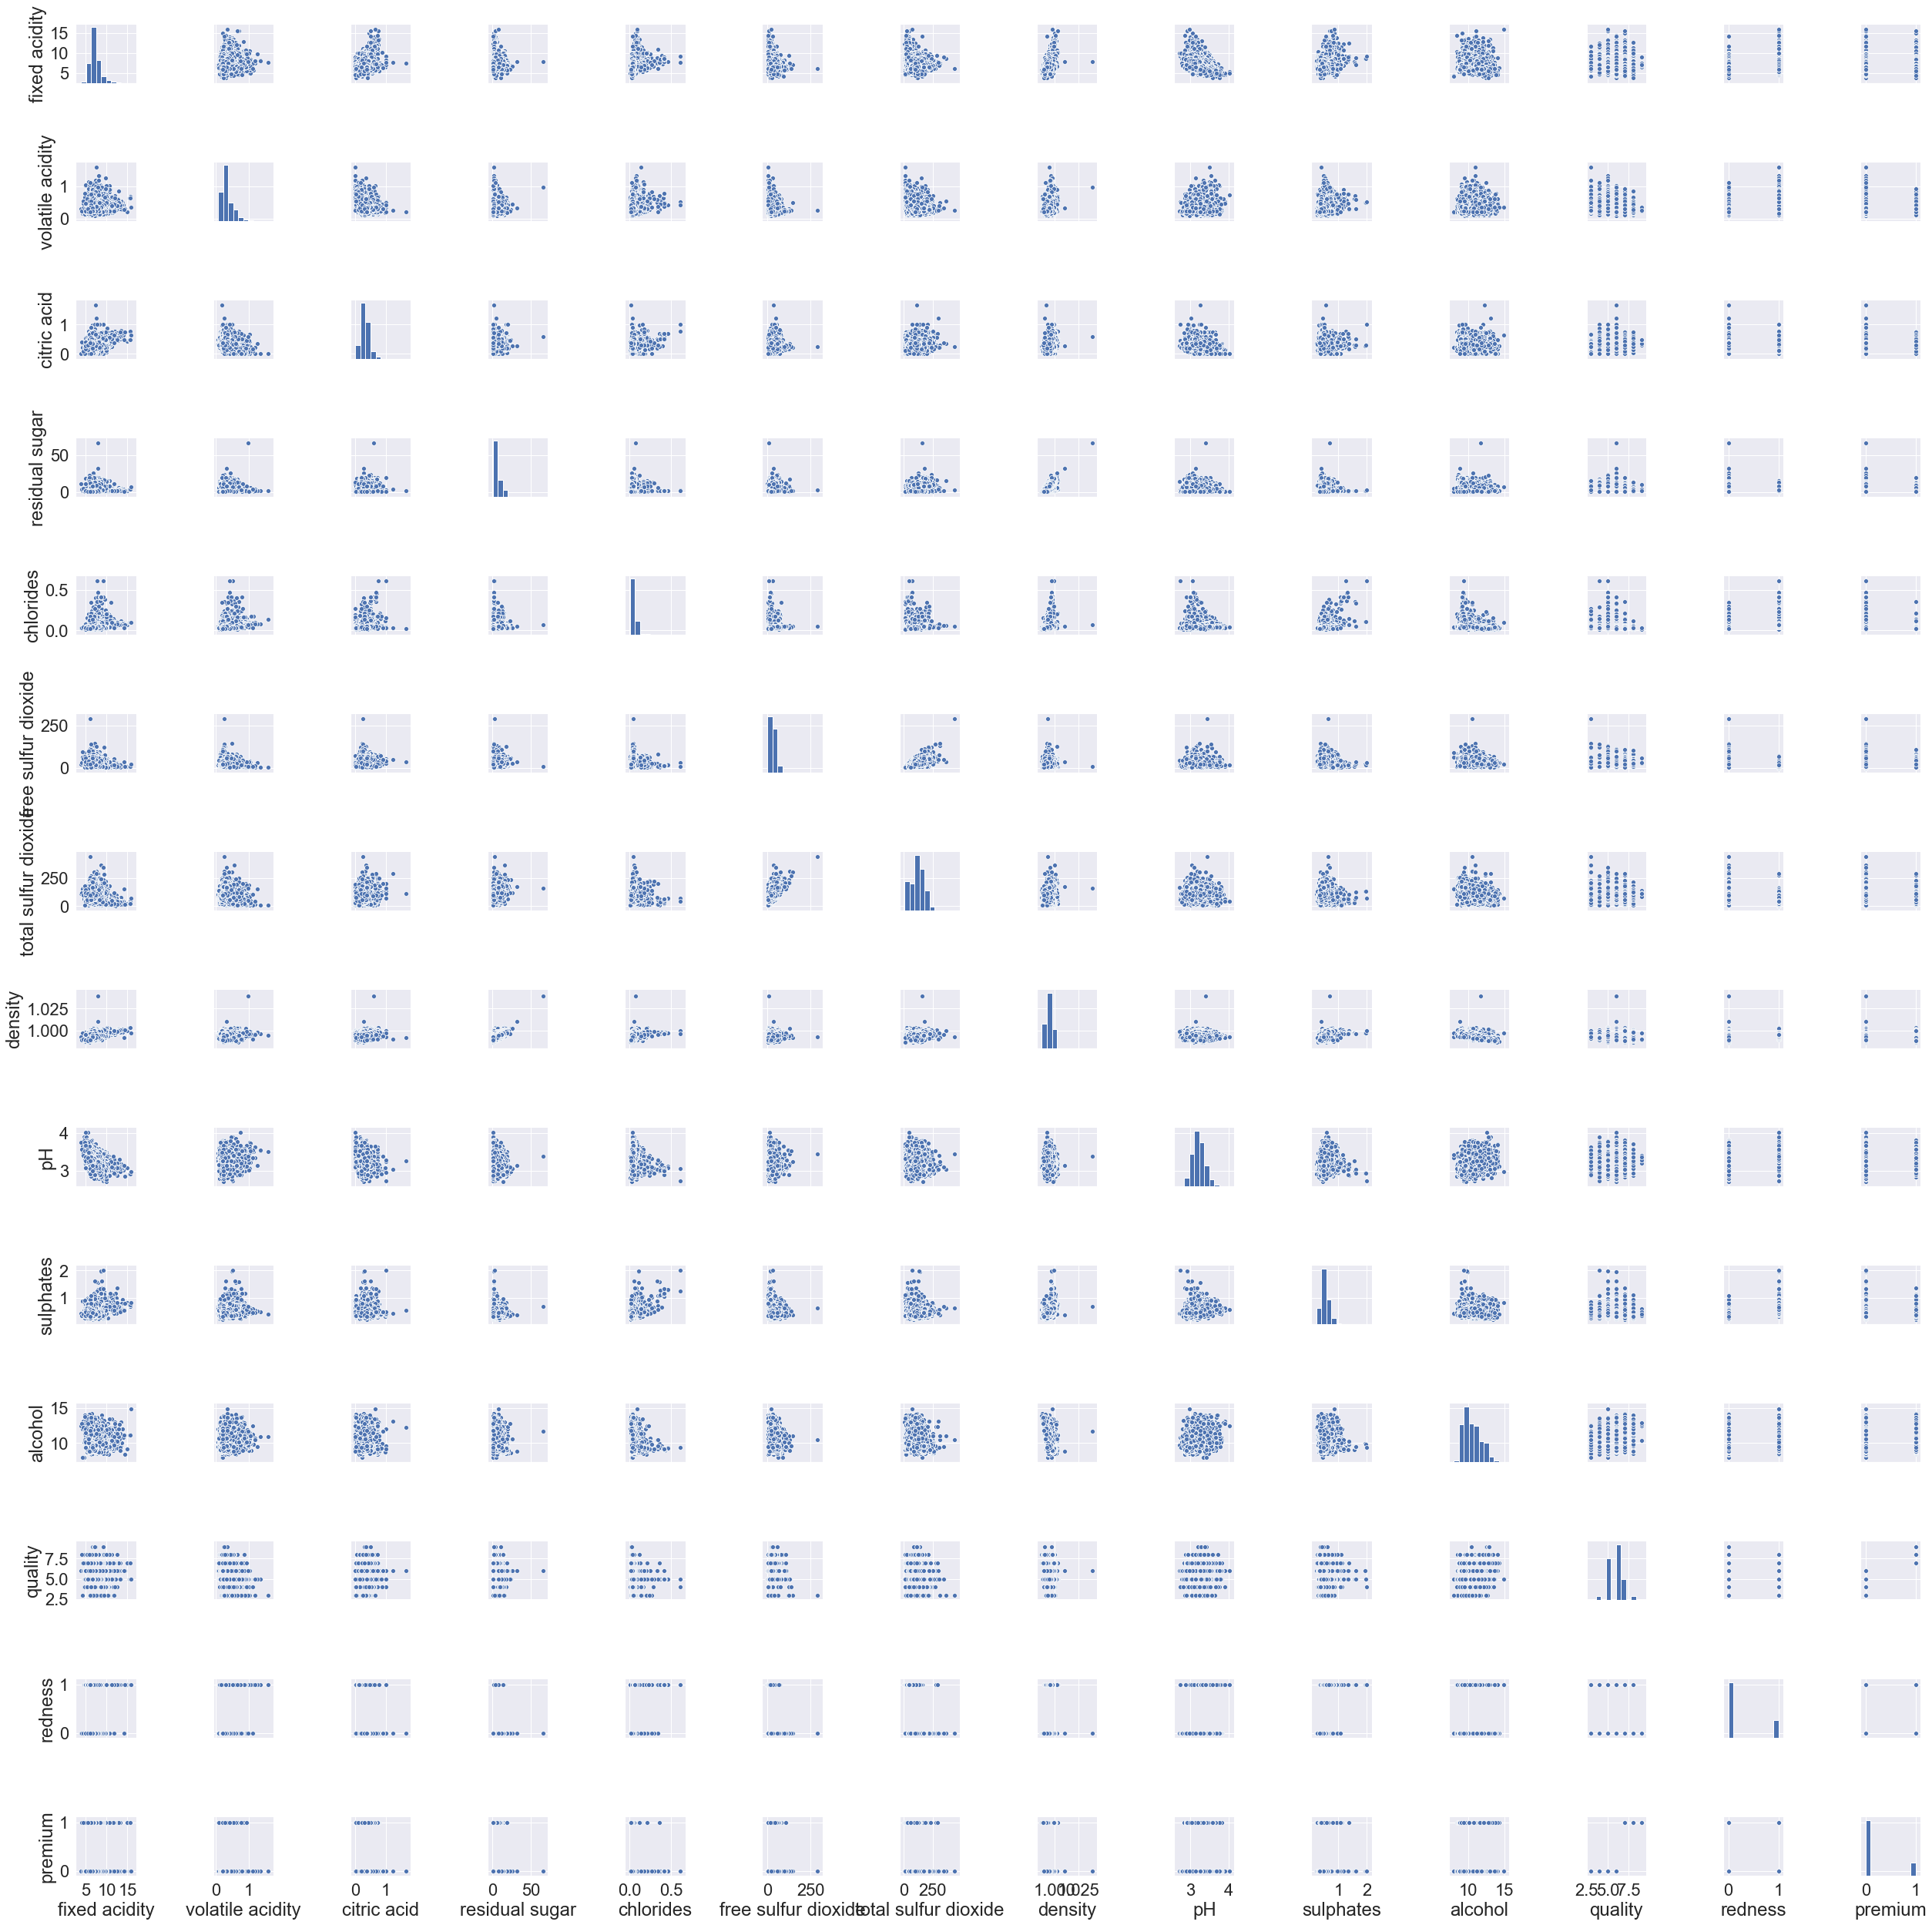

In [30]:
sns.set(font_scale=2)
sns.pairplot(data, palette = 'coolwarm');

In [38]:
fit.get_params() 

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'max_iter': 10000,
 'multi_class': 'multinomial',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': 0,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [ ]:
Initial Project Idea from:

https://elitedatascience.com/python-machine-learning-tutorial-scikit-learn#step-2